In [32]:
import sqlite3
import pandas as pd
import matplotlib as mpl
%matplotlib inline

In [33]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

def run_commnand(sql):
    with sqlite3.connect('chinook.db') as conn:
        cursor = conn.cursor()
        cursor.execute(sql)

def show_tables():
    sql = "SELECT name FROM sqlite_master WHERE type='table'"
    print (run_query(sql))

show_tables()

              name
0            album
1           artist
2         customer
3         employee
4            genre
5          invoice
6     invoice_line
7       media_type
8         playlist
9   playlist_track
10           track


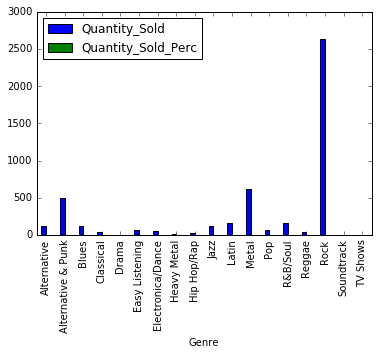

In [34]:
query1 = "SELECT g.name Genre, SUM(il.quantity) Quantity_Sold FROM invoice_line il INNER JOIN track t ON il.track_id = t.track_id INNER JOIN genre g ON g.genre_id = t.genre_id GROUP BY g.name "
res1 = run_query(query1).set_index("Genre")
res1['Quantity_Sold_Perc'] = res1['Quantity_Sold']/res1['Quantity_Sold'].sum()
#print(res1)
res1.plot.bar()

       First_Name Last_Name                Title  Total_Sales
EMP_ID                                                       
1          Andrew     Adams      General Manager       108.90
2           Nancy   Edwards        Sales Manager        82.17
3            Jane   Peacock  Sales Support Agent        99.99
4        Margaret      Park  Sales Support Agent        72.27
5           Steve   Johnson  Sales Support Agent       144.54
6         Michael  Mitchell           IT Manager       128.70
7          Robert      King             IT Staff        69.30
8           Laura  Callahan             IT Staff        60.39


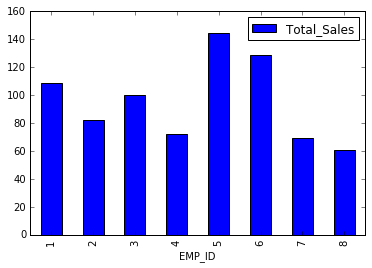

In [35]:
query2 = "SELECT e.employee_id EMP_ID, e.first_name First_Name, e.last_name Last_Name, e.title Title, SUM(i.total) Total_Sales FROM employee e INNER JOIN customer c ON e.employee_id = c.customer_id INNER JOIN invoice i on c.customer_id = i.customer_id GROUP BY e.employee_id"
res2 = run_query(query2).set_index("EMP_ID")
print(res2)
res2.plot.bar()

In [55]:
##a = "'DROP VIEW country_stats;'"
#run_commnand(a)

c = '''
CREATE VIEW country_stats7 AS
     SELECT
         c.country Country, COUNT(c.customer_id) Customer_Count, CAST(COUNT(i.invoice_id) AS float) Sale_P_Cust, AVG(i.total) AVG_Ord_Val
     FROM customer c
     LEFT JOIN invoice i ON c.customer_id = i.customer_id
     GROUP BY c.country;
'''
run_commnand(c)



In [56]:
query3 = "SELECT * FROM country_stats7"
res3 = run_query(query3)
print(res3)

           Country  Customer_Count  Sale_P_Cust  AVG_Ord_Val
0        Argentina               5          5.0     7.920000
1        Australia              10         10.0     8.118000
2          Austria               9          9.0     7.700000
3          Belgium               7          7.0     8.627143
4           Brazil              61         61.0     7.011148
5           Canada              76         76.0     7.047237
6            Chile              13         13.0     7.463077
7   Czech Republic              30         30.0     9.108000
8          Denmark              10         10.0     3.762000
9          Finland              11         11.0     7.200000
10          France              50         50.0     7.781400
11         Germany              41         41.0     8.161463
12         Hungary              10         10.0     7.821000
13           India              21         21.0     8.721429
14         Ireland              13         13.0     8.833846
15           Italy      